<a href="https://colab.research.google.com/github/joisse1101/WordleScrapy/blob/main/WordleScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wordle Scraper and Cheat Engine

#Part 1: Scraping Merriam-Webster for letter counts

In [ ]:
from bs4 import BeautifulSoup as bsoup
from collections import Counter
import matplotlib.pyplot as plt
import requests
import re
import seaborn as sns
import string

In [ ]:
letters = string.ascii_lowercase
l_frequency = Counter()
wordle = '^[a-z][a-z][a-z][a-z][a-z]$'
url = 'https://www.merriam-webster.com/browse/dictionary/'

In [ ]:
colour_list = ['#4e2f4b','#513552','#553b59','#584161','#5b4768','#5e4d6f','#605476','#635a7d','#666084','#68678b','#6b6d91','#6e7498','#707a9f','#7381a5','#7688ab','#788fb1','#7b95b7','#7e9cbd','#82a3c3',
               '#85aac9','#89b1ce','#8db7d4','#91bed9','#95c5de','#9acce3','#9fd3e8']

In [ ]:
dictionary = {}

def add_word(word, i, d):
  if i != 4: # not last letter
    if word[i] not in d:
      d.update({word[i]:{}})
    add_word(word, i+1, d[word[i]])
  else:
    d.update({word[i]:word})

In [ ]:
for i in letters:
  print(f'Searching {i}-s...')
  p_num = "1"
  while len(p_num) > 0:
    page = requests.get(url+i+'/'+ p_num)
    soup = bsoup(page.content, 'html.parser')
    page_entries = soup.find(class_='entries').find_all('a')
    for e in page_entries:
      if re.match(wordle, e.text):
        l_frequency.update(e.text)
        add_word(e.text, 0, dictionary)        
    p_num = soup.find(class_='next').find('a')['data-page']

Searching a-s...
Searching b-s...
Searching c-s...
Searching d-s...
Searching e-s...
Searching f-s...
Searching g-s...
Searching h-s...
Searching i-s...
Searching j-s...
Searching k-s...
Searching l-s...
Searching m-s...
Searching n-s...
Searching o-s...
Searching p-s...
Searching q-s...
Searching r-s...
Searching s-s...
Searching t-s...
Searching u-s...
Searching v-s...
Searching w-s...
Searching x-s...
Searching y-s...
Searching z-s...


In [ ]:
l_freq = list(l_frequency.items())
l_freq.sort(key=lambda x:-x[1])
total = sum(l_frequency.values())
lett = []
freq = []
for l, f in l_freq:
  lett.append(l)
  freq.append(f/total)

In [ ]:
from google.colab import files
import csv
import json

with open('wordle_dict.json', 'w') as dict_file:
  json.dump(dictionary, dict_file)

with open('sorted_letters', 'w') as csv_file:
  write = csv.writer(csv_file)
  write.writerow(lett)
  write.writerow(freq)

#files.download('wordle_dict.json')
#files.download('sorted_letters')

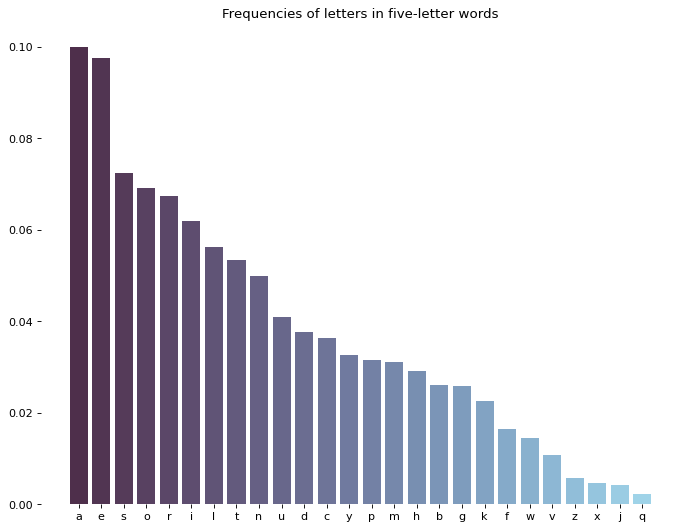

In [ ]:
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.set_title("Frequencies of letters in five-letter words")
ax.bar(lett, freq, color=colour_list)
sns.set(
    rc={
        'xtick.bottom':False,
        'ytick.left':False}
)
sns.despine(left=True, bottom=True)

#Part 2: Unscrabbling Wordle clues

In [ ]:
from google.colab import files
import csv
import json
import re

with open("wordle_dict.json", "r") as dict_file:
  dictionary = json.load(dict_file)

with open("sorted_letters", "r") as csv_file:
  read = csv.reader(csv_file)
  letters = next(read)

In [ ]:
def getWordle(clues, anticlues, order, xtra=0):
  wordles = []
  clues = [x for x in clues if re.match("[a-z]", x)]
  anticlues = [x for x in anticlues if re.match("[a-z]", x)]
  if len(order) != 5:
    order = None
  else:
    order = [x if re.match("[a-z]", x) else None for x in order]  
  
  i = 0
  if xtra < 0: xtra == 0

  extra = []
  while len(extra) < (5-len(clues)+xtra):
    if i >= len(letters):
      break
    if (letters[i] not in clues) and (letters[i] not in anticlues):
      extra.append(letters[i])
    i += 1

  def searchDict(clues, d):
    nonlocal wordles
    for i, c in enumerate(clues):
      if c in d:
        if type(d[c]) == str:
          if order == None:
            wordles.append(d[c])
          else:
            if checkWordle(d[c]):
              wordles.append(d[c])
        else:
          searchDict(clues[:i]+clues[i+1:], d[c])

  def checkWordle(word):
    for i in range(len(word)):
      if order[i] == None:
        continue
      elif order[i] != word[i]:
        return False
    return True
  
  window = 5-len(clues)
  for i in range(len(extra)-window+1):
    if i + window < len(extra):
      searchDict(clues+extra[i:i+window],dictionary)
    else:
      searchDict(clues+extra[i:],dictionary)
  print(wordles)

In [ ]:
clues = ''
anticlues = ''
order = ''
getWordle(clues, anticlues, order)

['arose']
